# Carbon Emission Analysis and Predictive Modeling Project
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com

## Project Overview
This project aims to analyze industrial carbon emissions and develop a predictive model to benchmark companies against industry standards. The objective is to generate accurate, explainable predictions of carbon emissions (`Carbon_Emission_tCO2e_TARGET`) while providing actionable insights for energy efficiency and carbon reduction strategies.

The dataset used includes company-level information on energy consumption, production, transport, raw material usage, carbon reduction strategies, financials, and social impact metrics. The ultimate goal is to create a system that supports regulatory compliance, decision-making, and sustainable industry practices.

---

## Project Workflow

### 1. Problem Definition
- Predict and benchmark carbon emissions for industrial companies.
- Identify key drivers of emissions and evaluate carbon reduction strategies.
- Ensure predictions adhere to regulatory and reporting requirements.

### 2. Data Understanding
- Explore the dataset for structure, missing values, and distributions.
- Analyze categorical variables such as `Sector`, `Supply_Chain_Transport_Mode`, and `Carbon_Reduction_Strategy`.
- Examine temporal trends using the `Date` column.

### 3. Data Preprocessing
- Clean data: handle missing values, remove duplicates, and standardize categorical labels.
- Engineer features:
  - Renewable and non-renewable energy share percentages.
  - Emissions per production unit.
  - Temporal features such as year and month.
- Encode categorical variables.
- Select relevant features for modeling.

### 4. Exploratory Data Analysis (EDA)
- Visualize trends in energy consumption, carbon emissions, and production output.
- Analyze sector-level differences and strategy effectiveness.
- Explore relationships between financial costs, process efficiency, and emissions.
- Generate summary statistics and visualizations (boxplots, heatmaps, time series).

### 5. Modeling
- **Target Variable:** `Carbon_Emission_tCO2e_TARGET` (continuous regression).
- **Candidate Models:**
  - Interpretable models: Linear Regression, Decision Trees, Explainable Boosting Machines (EBM).
  - Advanced models: Random Forests, Gradient Boosted Trees (XGBoost, LightGBM, CatBoost).
- **Model Evaluation:**
  - Metrics: MAE, RMSE, R².
  - Cross-validation stratified by sector to ensure unbiased performance.
  - Scenario analysis for regulatory and operational insights.

### 6. Model Explainability
- Use SHAP or LIME to interpret predictions.
- Identify the impact of energy mix, production, transport, and carbon strategies on emissions.
- Provide transparent, audit-ready explanations for regulatory compliance.

### 7. Deployment
- Implement the predictive model in a production-ready environment using Python APIs (FastAPI/Flask).
- Visualize results and scenario analyses using dashboards (Streamlit, Plotly Dash).
- Monitor model performance and retrain periodically.

### 8. Recommendations & Actionable Insights
- Prioritize high-impact carbon reduction strategies.
- Optimize energy consumption (renewable vs non-renewable).
- Reduce supply chain and material-related emissions.
- Provide industry-wide benchmarking for regulatory compliance and sustainability planning.

---

## Outcome
By following this methodology, the project delivers:
- A robust, explainable model for predicting carbon emissions.
- Actionable insights for companies to reduce emissions effectively.
- Benchmarking tools to support regulatory compliance and sustainable decision-making.


In [1]:
# 1. Import Libraries and Setup


# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Preprocessing & encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Explainability
import shap
import lime
import lime.lime_tabular

# Misc
import warnings
warnings.filterwarnings("ignore")


In [2]:
# 2. Load and Explore the Dataset

# Load the dataset
file_path = "carbon_emission_dataset_with_Industry.csv"  
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows:")
display(df.head())

# Check for missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())

# Explore unique values in categorical columns
categorical_columns = ['Sector', 'Supply_Chain_Transport_Mode', 'Carbon_Reduction_Strategy', 'Industry_Sectors']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Dataset Shape: (18250, 22)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company_ID                           18250 non-null  object 
 1   Date                                 18250 non-null  object 
 2   Sector                               18250 non-null  object 
 3   Total_Energy_Consumption_kWh         18250 non-null  float64
 4   Renewable_Energy_Consumption_kWh     18250 non-null  float64
 5   NonRenewable_Energy_Consumption_kWh  18250 non-null  float64
 6   Production_Output_Units              18250 non-null  float64
 7   Supply_Chain_Transport_km            18250 non-null  float64
 8   Supply_Chain_Transport_Mode          18250 non-null  object 
 9   Raw_Material_Usage_kg                18250 non-null  float64
 10  Carbon_Emission_tCO2e_TARGET         18250 non-null 

Company_ID        Date         Sector  Total_Energy_Consumption_kWh  \
0       C001  2024-01-01  Manufacturing                      53751.61   
1       C001  2024-01-02  Manufacturing                     170872.89   
2       C001  2024-01-03  Manufacturing                     142777.96   
3       C001  2024-01-04  Manufacturing                     152532.15   
4       C001  2024-01-05  Manufacturing                      81647.43   

   Renewable_Energy_Consumption_kWh  NonRenewable_Energy_Consumption_kWh  \
0                          12766.80                             40984.81   
1                          76733.84                             94139.05   
2                          75794.17                             66983.79   
3                          20698.80                            131833.35   
4                          46657.82                             34989.61   

   Production_Output_Units  Supply_Chain_Transport_km  \
0                  3008.90                    3814.12   
1                  4062.25                    1199.66   
2                  6196.17                    3670.57   
3                  6714.80                    2903.63   
4                  8887.31                    1916.05   

  Supply_Chain_Transport_Mode  Raw_Material_Usage_kg  ...  Carbon_Tax_USD  \
0                       Truck               51334.48  ...          338.76   
1                         Air               17154.72  ...         1073.13   
2                       Truck               56288.43  ...         1390.41   
3                        Ship               21438.17  ...         1942.56   
4                        Rail               37694.23  ...          472.20   

   Process_Efficiency_Percent  Employment_Count  Public_Acceptance_Index  \
0                       81.07              2128                     0.77   
1                       69.26               855                     0.77   
2                       90.33              3613                     0.48   
3                       79.49              3156                     0.85   
4                       68.63              4915                     0.47   

   Carbon_Reduction_Strategy  Strategy_Implementation_Cost_USD  \
0      Process Reengineering                         188176.25   
1         Efficiency Upgrade                         489246.31   
2      Carbon Tax Compliance                         165061.64   
3         Efficiency Upgrade                         191619.23   
4      Process Reengineering                         459129.15   

  Expected_Carbon_Reduction_Percent  Expected_Renewable_Share_Percent  \
0                             16.79                             40.89   
1                             12.57                             58.19   
2                             12.11                             68.14   
3                              5.64                             23.30   
4                             12.99                             65.44   

   Social_Impact_Score     Industry_Sectors  
0                 0.40  Steel Manufacturing  
1                 0.86    Cement Production  
2                 0.79  Automotive Industry  
3                 0.55            Logistics  
4                 0.95  Steel Manufacturing  

[5 rows x 22 columns]


Missing Values by Column:
Company_ID                             0
Date                                   0
Sector                                 0
Total_Energy_Consumption_kWh           0
Renewable_Energy_Consumption_kWh       0
NonRenewable_Energy_Consumption_kWh    0
Production_Output_Units                0
Supply_Chain_Transport_km              0
Supply_Chain_Transport_Mode            0
Raw_Material_Usage_kg                  0
Carbon_Emission_tCO2e_TARGET           0
Energy_Cost_USD                        0
Carbon_Tax_USD                         0
Process_Efficiency_Percent             0
Employment_Count                       0
Public_Acceptance_Index                0
Carbon_Reduction_Strategy              0
Strategy_Implementation_Cost_USD       0
Expected_Carbon_Reduction_Percent      0
Expected_Renewable_Share_Percent       0
Social_Impact_Score                    0
Industry_Sectors                       0
dtype: int64

Summary Statistics:


Total_Energy_Consumption_kWh  Renewable_Energy_Consumption_kWh  \
count                  18250.000000                      18250.000000   
mean                  124776.987158                      43759.097184   
std                    43106.624251                      24291.666951   
min                    50008.730000                       5041.200000   
25%                    87326.365000                      24455.502500   
50%                   124728.530000                      38888.005000   
75%                   162042.955000                      59545.025000   
max                   199988.910000                     119005.260000   

       NonRenewable_Energy_Consumption_kWh  Production_Output_Units  \
count                         18250.000000             18250.000000   
mean                          81017.889975              5538.963915   
std                           33957.852247              2597.576117   
min                           20483.260000              1000.470000   
25%                           53738.547500              3273.995000   
50%                           77007.820000              5556.400000   
75%                          104085.372500              7802.095000   
max                          179431.020000              9999.780000   

       Supply_Chain_Transport_km  Raw_Material_Usage_kg  \
count               18250.000000           18250.000000   
mean                 2734.813587           44869.415215   
std                  1300.146027           20110.509566   
min                   500.380000           10006.500000   
25%                  1609.122500           27439.335000   
50%                  2735.020000           44803.630000   
75%                  3862.717500           62291.027500   
max                  4999.890000           79994.460000   

       Carbon_Emission_tCO2e_TARGET  Energy_Cost_USD  Carbon_Tax_USD  \
count                  18250.000000     18250.000000    18250.000000   
mean                      32.365099     10600.982042     1129.541275   
std                       14.482041      4532.900551      590.407029   
min                        6.814900      2524.200000      155.740000   
25%                       20.969350      6979.210000      682.407500   
50%                       30.154550     10001.700000     1012.145000   
75%                       41.520400     13621.385000     1464.847500   
max                       86.571800     23880.690000     4211.600000   

       Process_Efficiency_Percent  Employment_Count  Public_Acceptance_Index  \
count                18250.000000      18250.000000             18250.000000   
mean                    77.623844       2734.349041                 0.624569   
std                     10.112534       1298.648265                 0.187841   
min                     60.000000        500.000000                 0.300000   
25%                     68.880000       1603.000000                 0.460000   
50%                     77.660000       2730.000000                 0.625000   
75%                     86.317500       3853.750000                 0.790000   
max                     95.000000       5000.000000                 0.950000   

       Strategy_Implementation_Cost_USD  Expected_Carbon_Reduction_Percent  \
count                      18250.000000                       18250.000000   
mean                      299333.028470                          15.067031   
std                       115674.898008                           5.794350   
min                       100052.340000                           5.000000   
25%                       199132.372500                          10.040000   
50%                       297477.130000                          15.100000   
75%                       399960.932500                          20.070000   
max                       499881.170000                          25.000000   

       Expected_Renewable_Share_Percent  Social_Impact_Score  
count                      18250.000000  


Unique values in Sector:
Sector
Manufacturing    5110
Agriculture      4380
Energy           3650
Transport        3650
IT               1460
Name: count, dtype: int64

Unique values in Supply_Chain_Transport_Mode:
Supply_Chain_Transport_Mode
Ship     4581
Air      4567
Truck    4559
Rail     4543
Name: count, dtype: int64

Unique values in Carbon_Reduction_Strategy:
Carbon_Reduction_Strategy
Process Reengineering    4632
Efficiency Upgrade       4594
Carbon Tax Compliance    4567
Renewable Adoption       4457
Name: count, dtype: int64

Unique values in Industry_Sectors:
Industry_Sectors
Steel Manufacturing    4563
Cement Production      4563
Automotive Industry    4562
Logistics              4562
Name: count, dtype: int64


In [3]:
# 3. Data Preprocessing & Feature Engineering

# 1. Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Create new features
df['Renewable_Share_Percent'] = (df['Renewable_Energy_Consumption_kWh'] / df['Total_Energy_Consumption_kWh']) * 100
df['NonRenewable_Share_Percent'] = (df['NonRenewable_Energy_Consumption_kWh'] / df['Total_Energy_Consumption_kWh']) * 100
df['Emission_per_Unit'] = df['Carbon_Emission_tCO2e_TARGET'] / df['Production_Output_Units']

# 3. Extract temporal features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# 4. Encode categorical variables using one-hot encoding
categorical_columns = ['Sector', 'Supply_Chain_Transport_Mode', 'Carbon_Reduction_Strategy', 'Industry_Sectors']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 5. Display the updated dataframe info
print("Updated Dataset Shape:", df_encoded.shape)
print("\nFirst 5 Rows after Preprocessing:")
display(df_encoded.head())

# 6. Check for any remaining missing values
print("\nMissing Values by Column after Preprocessing:")
print(df_encoded.isnull().sum())


Updated Dataset Shape: (18250, 37)

First 5 Rows after Preprocessing:


Company_ID       Date  Total_Energy_Consumption_kWh  \
0       C001 2024-01-01                      53751.61   
1       C001 2024-01-02                     170872.89   
2       C001 2024-01-03                     142777.96   
3       C001 2024-01-04                     152532.15   
4       C001 2024-01-05                      81647.43   

   Renewable_Energy_Consumption_kWh  NonRenewable_Energy_Consumption_kWh  \
0                          12766.80                             40984.81   
1                          76733.84                             94139.05   
2                          75794.17                             66983.79   
3                          20698.80                            131833.35   
4                          46657.82                             34989.61   

   Production_Output_Units  Supply_Chain_Transport_km  Raw_Material_Usage_kg  \
0                  3008.90                    3814.12               51334.48   
1                  4062.25                    1199.66               17154.72   
2                  6196.17                    3670.57               56288.43   
3                  6714.80                    2903.63               21438.17   
4                  8887.31                    1916.05               37694.23   

   Carbon_Emission_tCO2e_TARGET  Energy_Cost_USD  ...  Sector_Transport  \
0                       12.5560          3040.12  ...             False   
1                       35.3949         12837.43  ...             False   
2                       30.4517         16985.65  ...             False   
3                       49.5550         18192.00  ...             False   
4                       16.8968          6704.86  ...             False   

   Supply_Chain_Transport_Mode_Rail  Supply_Chain_Transport_Mode_Ship  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                              True   
4                              True                             False   

   Supply_Chain_Transport_Mode_Truck  \
0                               True   
1                              False   
2                               True   
3                              False   
4                              False   

   Carbon_Reduction_Strategy_Efficiency Upgrade  \
0                                         False   
1                                          True   
2                                         False   
3                                          True   
4                                         False   

   Carbon_Reduction_Strategy_Process Reengineering  \
0                                             True   
1                                            False   
2                                            False   
3                                            False   
4                                             True   

   Carbon_Reduction_Strategy_Renewable Adoption  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Industry_Sectors_Cement Production  Industry_Sectors_Logistics  \
0                               False                       False   
1                                True                       False   
2                               False                       False   
3                               False                        True   
4                               False                       False   

   Industry_Sectors_Steel Manufacturing  
0                                  True  
1                                 False  
2                                 False  
3                                 False  
4                         


Missing Values by Column after Preprocessing:
Company_ID                                         0
Date                                               0
Total_Energy_Consumption_kWh                       0
Renewable_Energy_Consumption_kWh                   0
NonRenewable_Energy_Consumption_kWh                0
Production_Output_Units                            0
Supply_Chain_Transport_km                          0
Raw_Material_Usage_kg                              0
Carbon_Emission_tCO2e_TARGET                       0
Energy_Cost_USD                                    0
Carbon_Tax_USD                                     0
Process_Efficiency_Percent                         0
Employment_Count                                   0
Public_Acceptance_Index                            0
Strategy_Implementation_Cost_USD                   0
Expected_Carbon_Reduction_Percent                  0
Expected_Renewable_Share_Percent                   0
Social_Impact_Score                                0

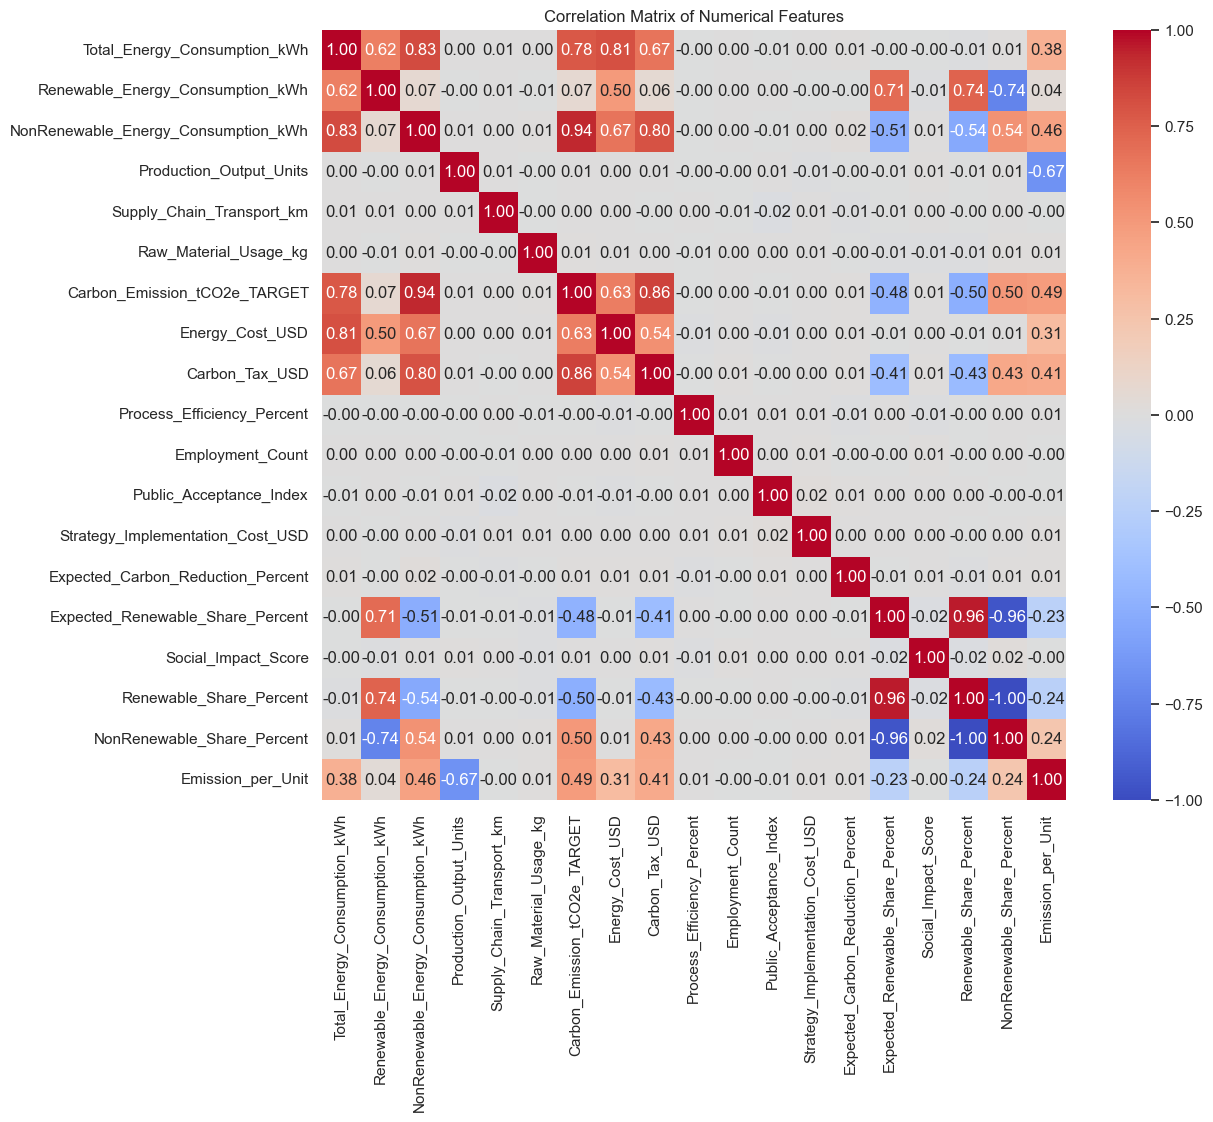

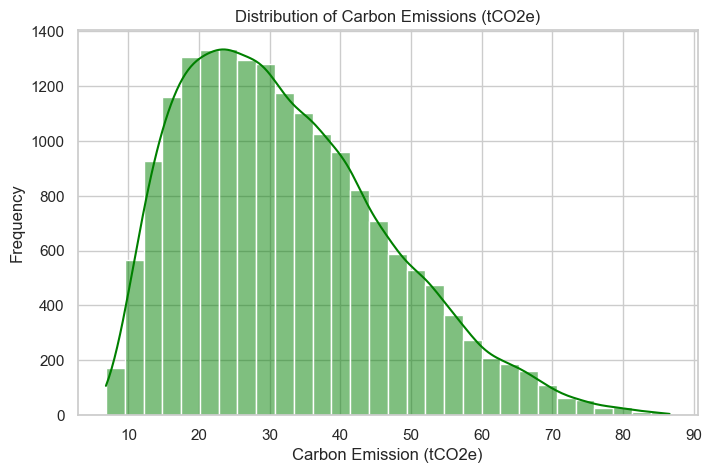

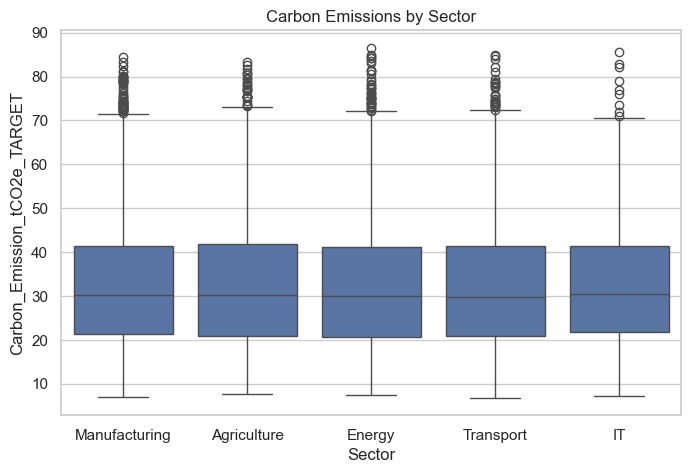

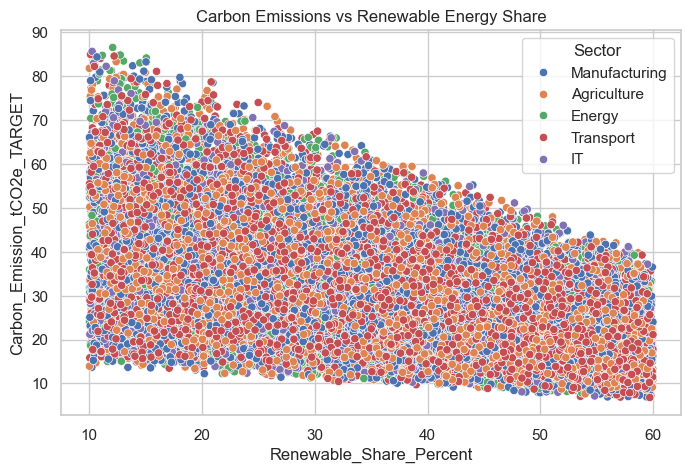

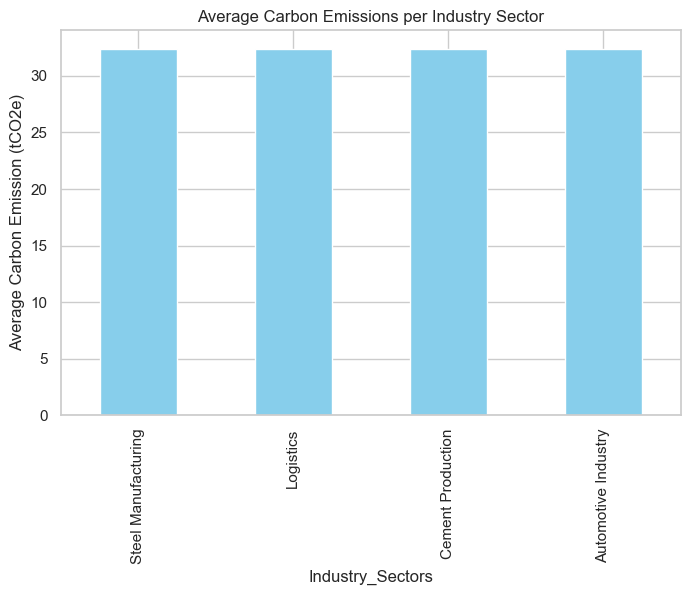

In [4]:
# 4. Exploratory Data Analysis (EDA)

# 1. Correlation matrix for numerical features
plt.figure(figsize=(12,10))
numerical_cols = ['Total_Energy_Consumption_kWh', 'Renewable_Energy_Consumption_kWh', 
                  'NonRenewable_Energy_Consumption_kWh', 'Production_Output_Units', 
                  'Supply_Chain_Transport_km', 'Raw_Material_Usage_kg', 
                  'Carbon_Emission_tCO2e_TARGET', 'Energy_Cost_USD', 'Carbon_Tax_USD', 
                  'Process_Efficiency_Percent', 'Employment_Count', 'Public_Acceptance_Index', 
                  'Strategy_Implementation_Cost_USD', 'Expected_Carbon_Reduction_Percent', 
                  'Expected_Renewable_Share_Percent', 'Social_Impact_Score', 
                  'Renewable_Share_Percent', 'NonRenewable_Share_Percent', 'Emission_per_Unit']

corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 2. Distribution of target variable (Carbon Emission)
plt.figure(figsize=(8,5))
sns.histplot(df['Carbon_Emission_tCO2e_TARGET'], bins=30, kde=True, color='green')
plt.title("Distribution of Carbon Emissions (tCO2e)")
plt.xlabel("Carbon Emission (tCO2e)")
plt.ylabel("Frequency")
plt.show()

# 3. Carbon Emissions by Sector
plt.figure(figsize=(8,5))
sns.boxplot(x='Sector', y='Carbon_Emission_tCO2e_TARGET', data=df)
plt.title("Carbon Emissions by Sector")
plt.show()

# 4. Carbon Emissions vs Renewable Share
plt.figure(figsize=(8,5))
sns.scatterplot(x='Renewable_Share_Percent', y='Carbon_Emission_tCO2e_TARGET', hue='Sector', data=df)
plt.title("Carbon Emissions vs Renewable Energy Share")
plt.show()

# 5. Average Emission per Industry Sector
avg_emission_sector = df.groupby('Industry_Sectors')['Carbon_Emission_tCO2e_TARGET'].mean().sort_values()
avg_emission_sector.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Average Carbon Emissions per Industry Sector")
plt.ylabel("Average Carbon Emission (tCO2e)")
plt.show()


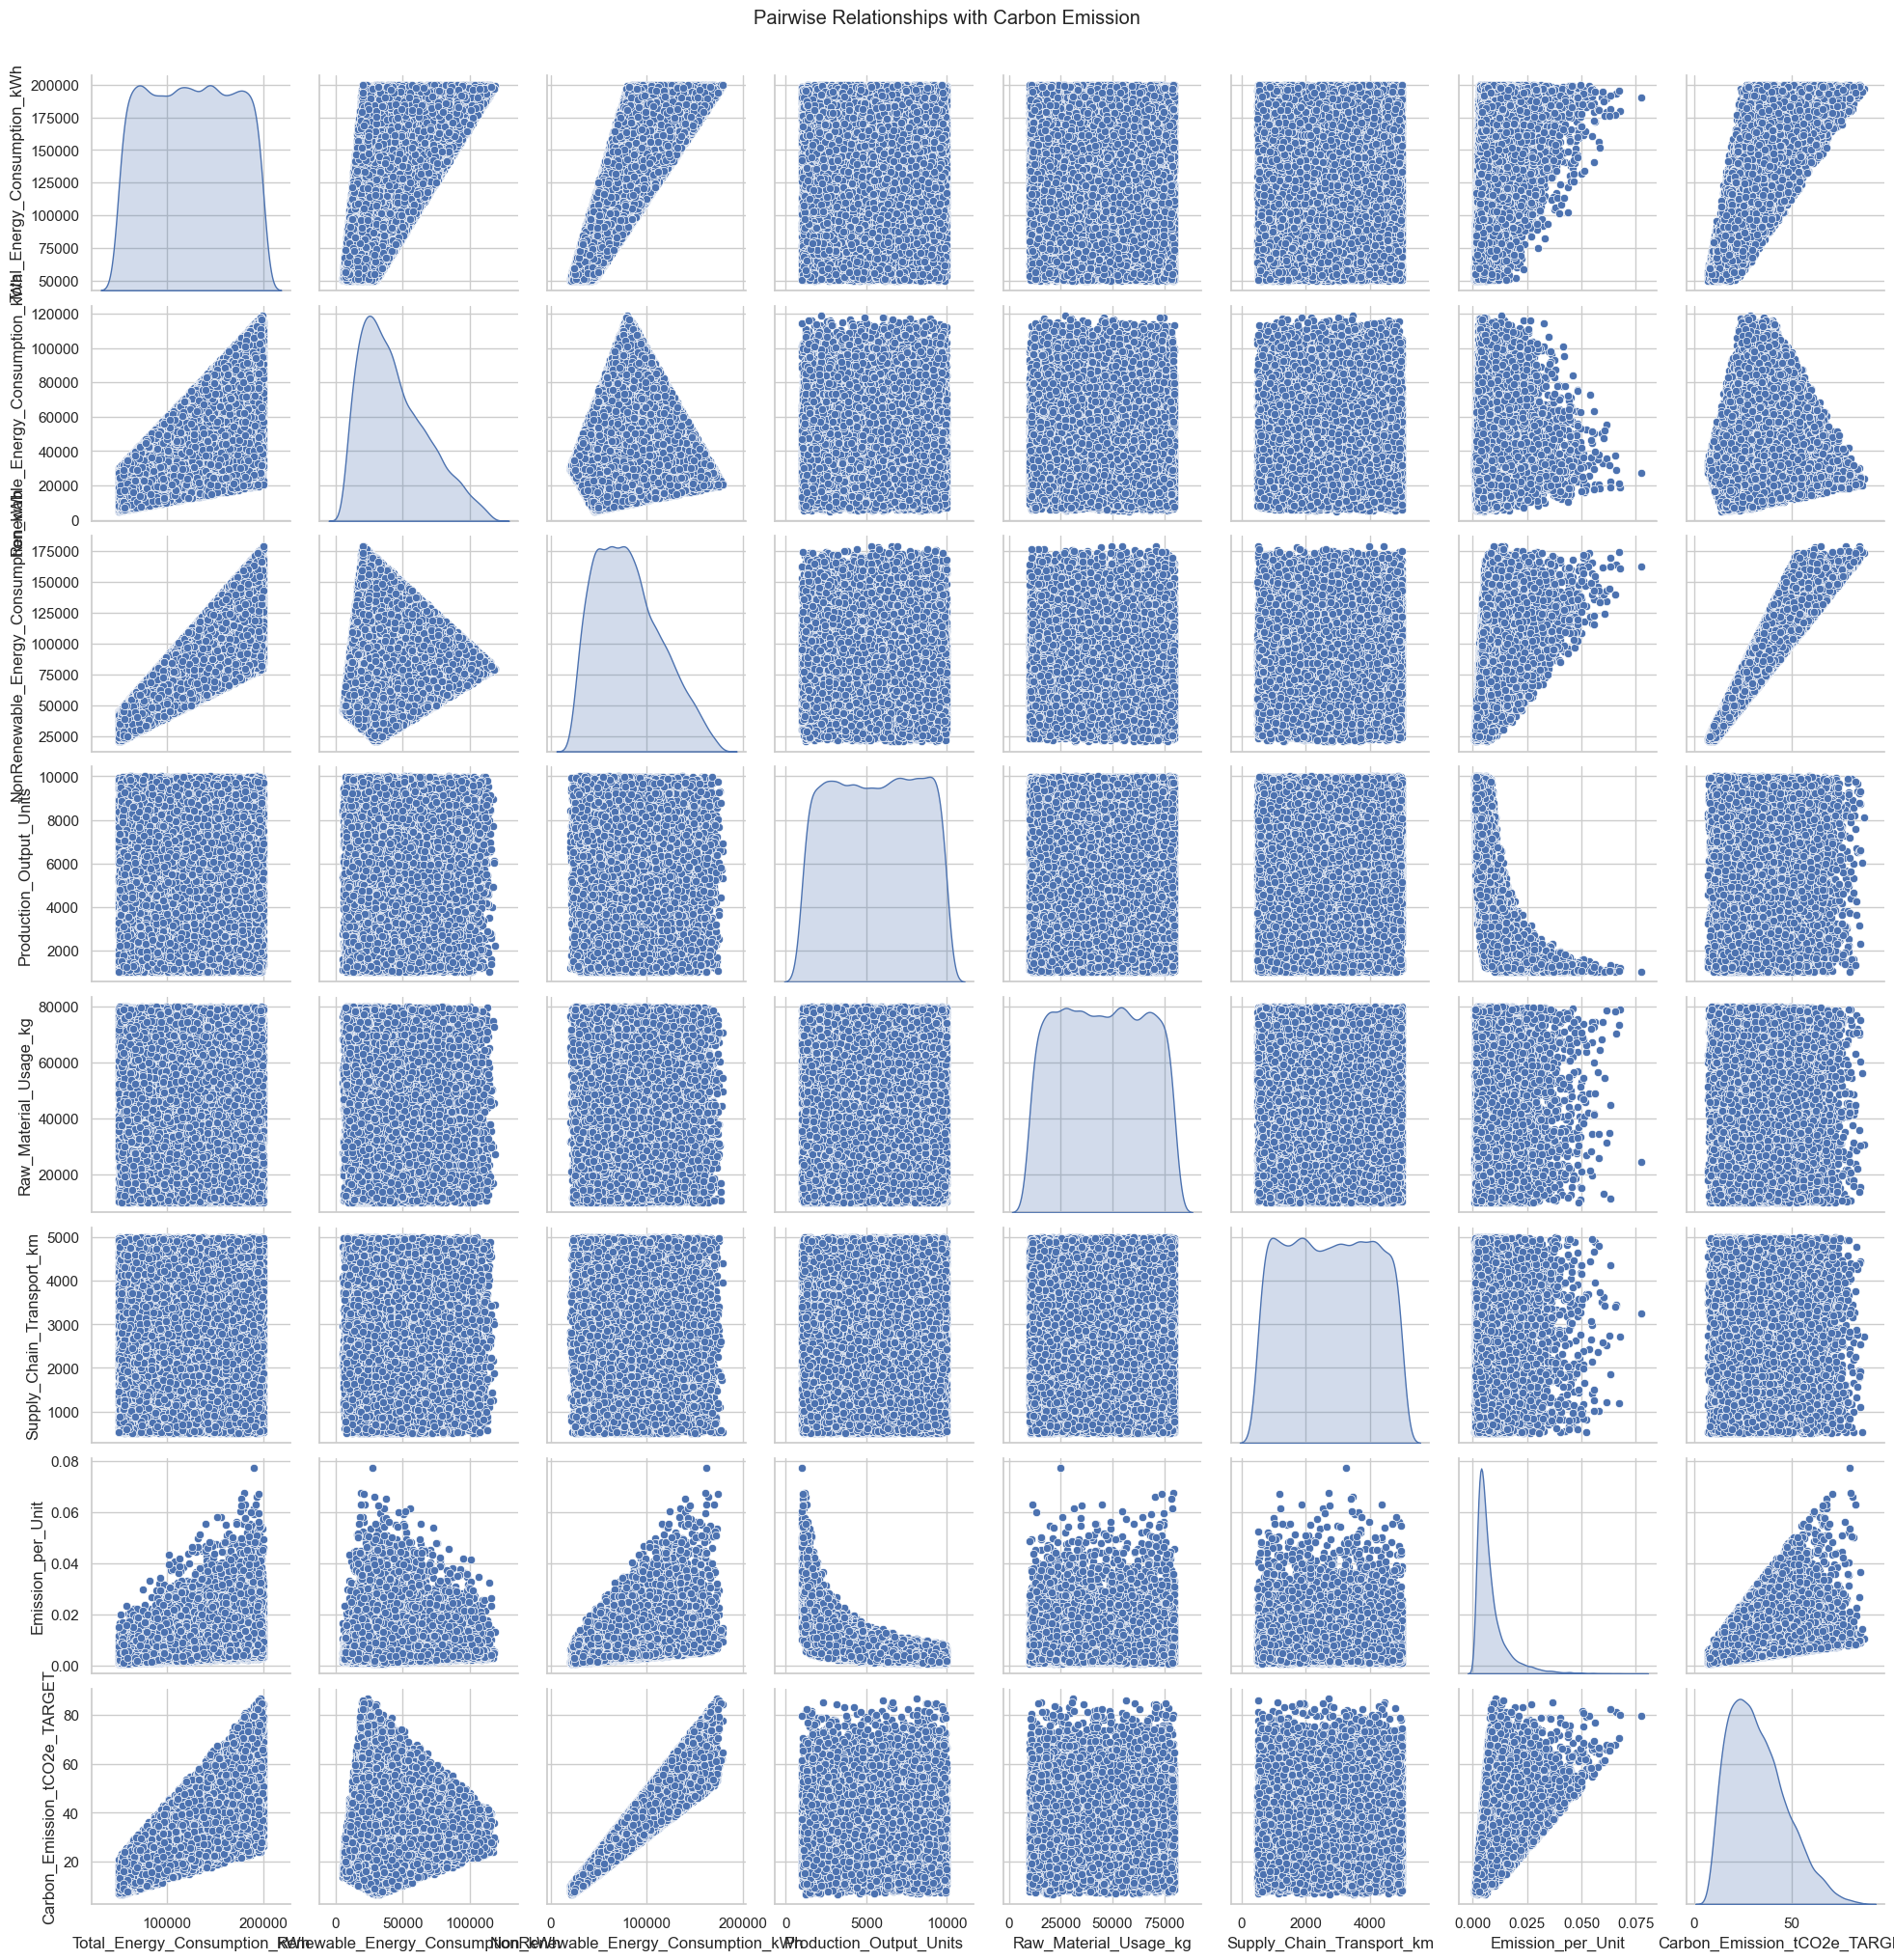

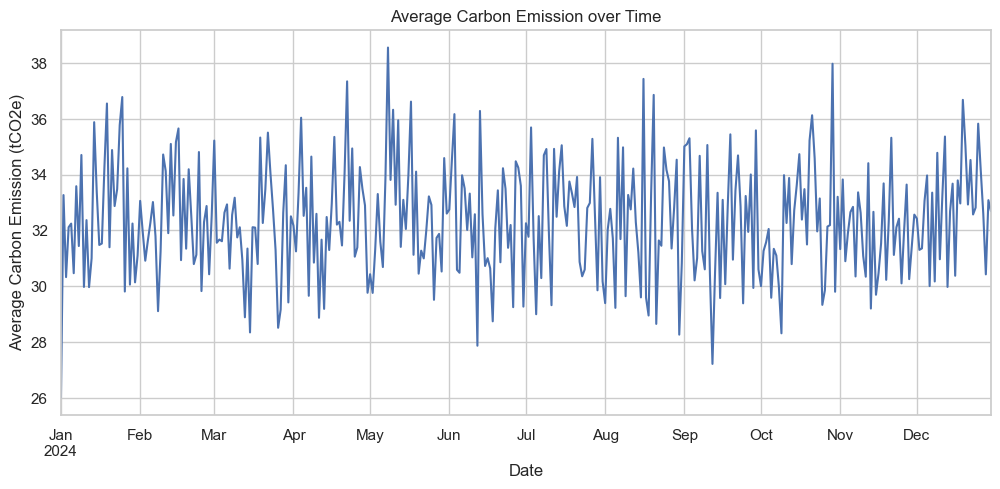

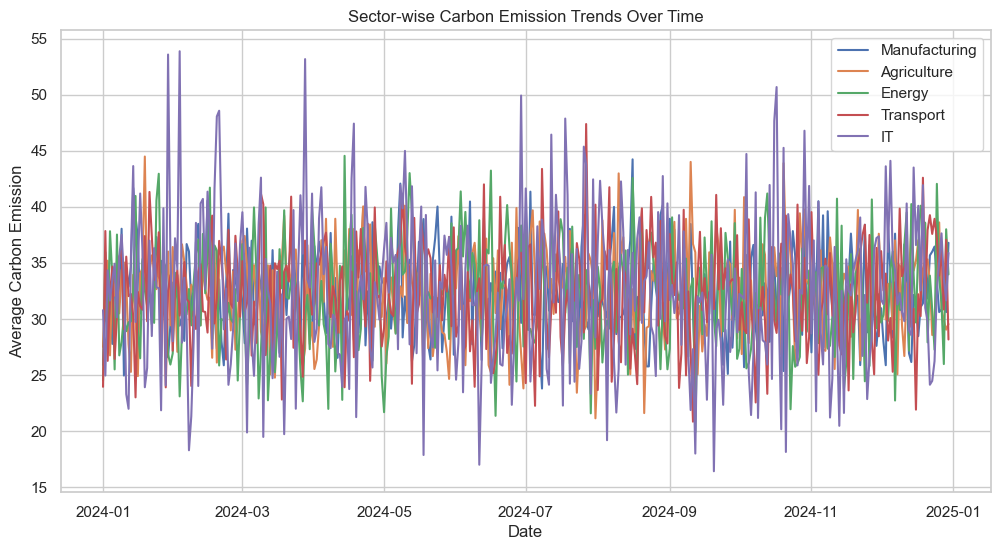

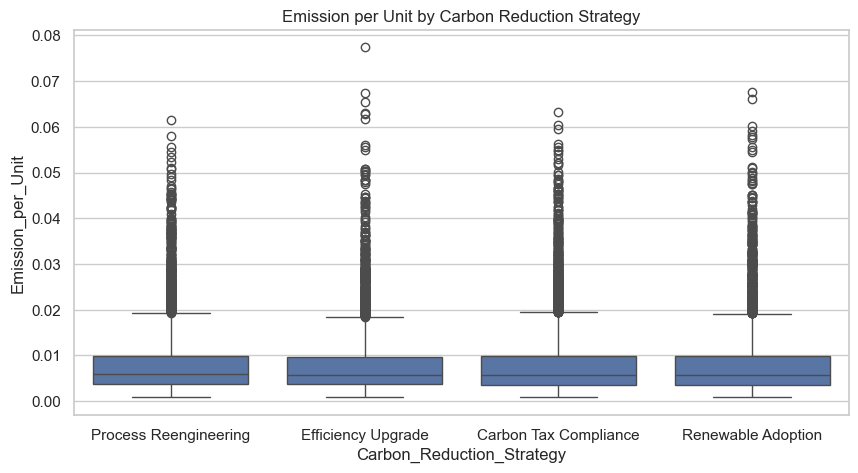

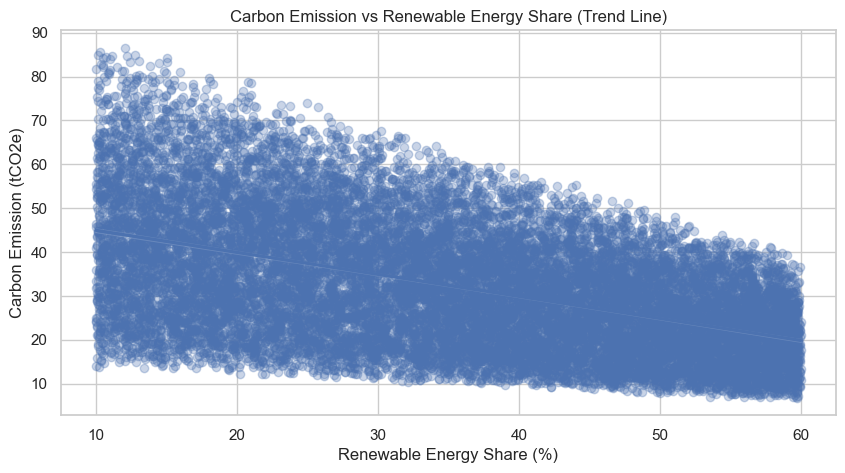

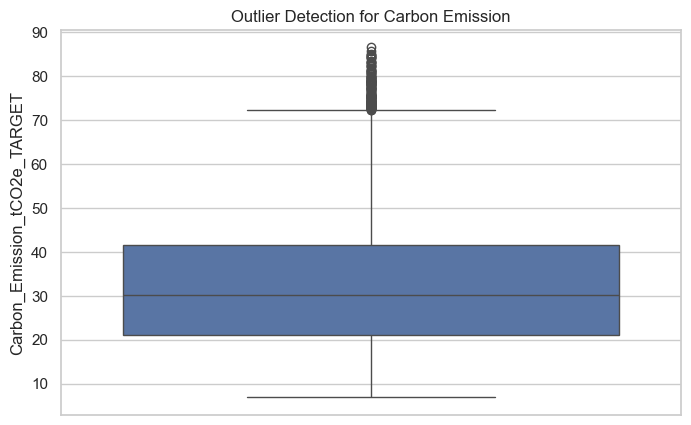

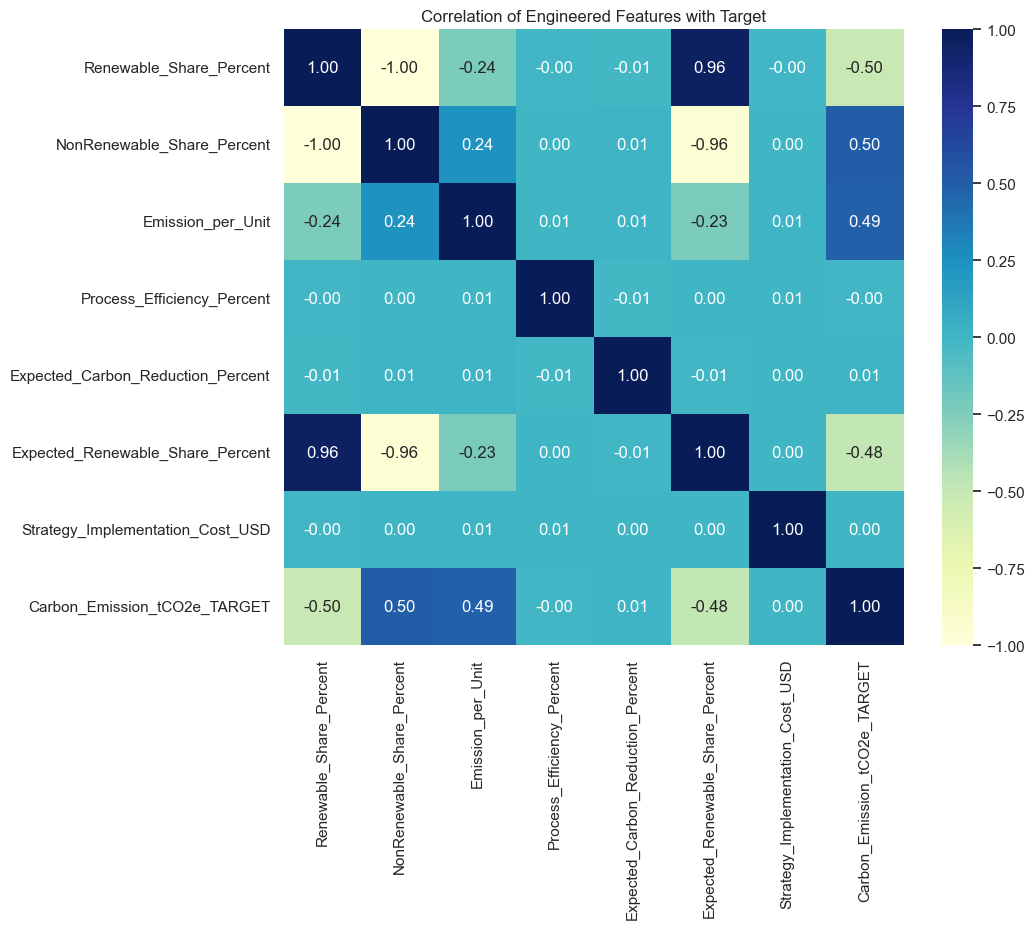

In [5]:
# 4b. Comprehensive EDA


import matplotlib.ticker as mtick

# 1. Pairwise relationships of key numerical features with target
key_numerical = ['Total_Energy_Consumption_kWh', 'Renewable_Energy_Consumption_kWh', 
                 'NonRenewable_Energy_Consumption_kWh', 'Production_Output_Units', 
                 'Raw_Material_Usage_kg', 'Supply_Chain_Transport_km', 
                 'Emission_per_Unit']

sns.pairplot(df[key_numerical + ['Carbon_Emission_tCO2e_TARGET']], diag_kind='kde')
plt.suptitle("Pairwise Relationships with Carbon Emission", y=1.02)
plt.show()

# 2. Temporal trend of average emissions
avg_emission_time = df.groupby('Date')['Carbon_Emission_tCO2e_TARGET'].mean()
plt.figure(figsize=(12,5))
avg_emission_time.plot()
plt.title("Average Carbon Emission over Time")
plt.ylabel("Average Carbon Emission (tCO2e)")
plt.xlabel("Date")
plt.show()

# 3. Sector-wise temporal trends
plt.figure(figsize=(12,6))
for sector in df['Sector'].unique():
    sector_data = df[df['Sector'] == sector].groupby('Date')['Carbon_Emission_tCO2e_TARGET'].mean()
    plt.plot(sector_data.index, sector_data.values, label=sector)
plt.title("Sector-wise Carbon Emission Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Carbon Emission")
plt.legend()
plt.show()

# 4. Boxplots of Emission per Unit by Carbon Reduction Strategy
plt.figure(figsize=(10,5))
sns.boxplot(x='Carbon_Reduction_Strategy', y='Emission_per_Unit', data=df)
plt.title("Emission per Unit by Carbon Reduction Strategy")
plt.show()

# 5. Impact of Renewable Energy Share on Emissions (with trend line)
plt.figure(figsize=(10,5))
sns.regplot(x='Renewable_Share_Percent', y='Carbon_Emission_tCO2e_TARGET', data=df, scatter_kws={'alpha':0.3})
plt.title("Carbon Emission vs Renewable Energy Share (Trend Line)")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Carbon Emission (tCO2e)")
plt.show()

# 6. Outlier Detection in Carbon Emission
plt.figure(figsize=(8,5))
sns.boxplot(y='Carbon_Emission_tCO2e_TARGET', data=df)
plt.title("Outlier Detection for Carbon Emission")
plt.show()

# 7. Heatmap of correlations for engineered features
engineered_features = ['Renewable_Share_Percent', 'NonRenewable_Share_Percent', 'Emission_per_Unit',
                       'Process_Efficiency_Percent', 'Expected_Carbon_Reduction_Percent', 
                       'Expected_Renewable_Share_Percent', 'Strategy_Implementation_Cost_USD', 
                       'Carbon_Emission_tCO2e_TARGET']

plt.figure(figsize=(10,8))
sns.heatmap(df[engineered_features].corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation of Engineered Features with Target")
plt.show()

In [6]:
# 5. Modeling: Train/Test Split, Model Training & Feature Importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for clean output

# 1. Define features (X) and target (y)
target = 'Carbon_Emission_tCO2e_TARGET'
features = df_encoded.drop(columns=['Company_ID', 'Date', target])
X = features
y = df_encoded[target]

# 2. Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42, verbosity=0)
}

# 4. Train models and evaluate performance
model_performance = {}
feature_importances = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Works for all versions
    r2 = r2_score(y_test, y_pred)
    
    model_performance[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    
    # Extract feature importance for tree-based models
    if name in ['Random Forest', 'XGBoost']:
        feature_importances[name] = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 5. Display model performance
performance_df = pd.DataFrame(model_performance).T.sort_values(by='RMSE')
print("\nModel Performance on Test Set:")
display(performance_df)

# 6. Display top 10 features for tree-based models
for model_name, fi in feature_importances.items():
    print(f"\nTop 10 Feature Importances for {model_name}:")
    display(fi.head(10))


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training XGBoost...

Model Performance on Test Set:


MAE      RMSE        R2
XGBoost            1.157490  1.540562  0.988716
Random Forest      2.193414  3.119908  0.953722
Linear Regression  3.182687  4.136054  0.918668
Ridge Regression   3.266177  4.223867  0.915178
Lasso Regression   3.304674  4.280101  0.912905


Top 10 Feature Importances for Random Forest:


NonRenewable_Energy_Consumption_kWh    0.907138
Carbon_Tax_USD                         0.041868
Emission_per_Unit                      0.027110
Production_Output_Units                0.016880
Employment_Count                       0.000577
Supply_Chain_Transport_km              0.000564
Strategy_Implementation_Cost_USD       0.000542
Energy_Cost_USD                        0.000533
Expected_Carbon_Reduction_Percent      0.000528
Raw_Material_Usage_kg                  0.000514
dtype: float64


Top 10 Feature Importances for XGBoost:


NonRenewable_Energy_Consumption_kWh    0.829427
Carbon_Tax_USD                         0.043386
Emission_per_Unit                      0.026116
Production_Output_Units                0.024150
NonRenewable_Share_Percent             0.015744
Sector_Energy                          0.005300
Renewable_Share_Percent                0.005044
Sector_Transport                       0.003807
Employment_Count                       0.003460
Social_Impact_Score                    0.003440
dtype: float32

 97%|=================== | 485/500 [00:12<00:00]       

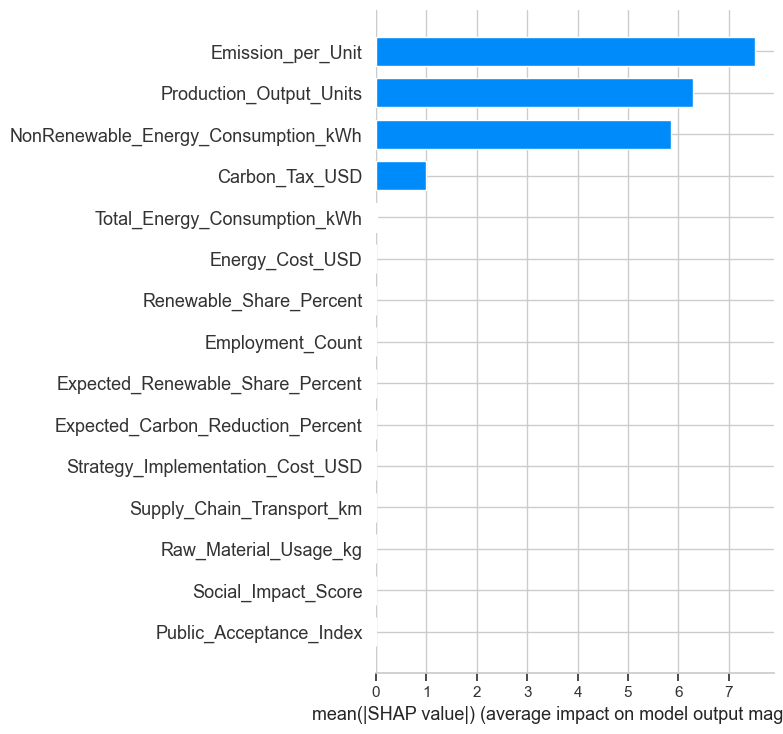

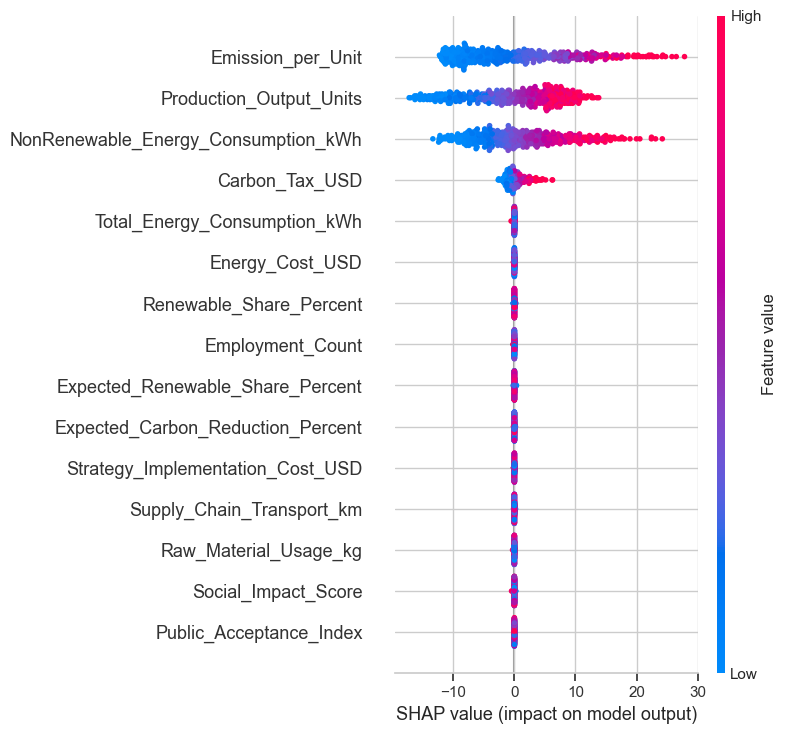

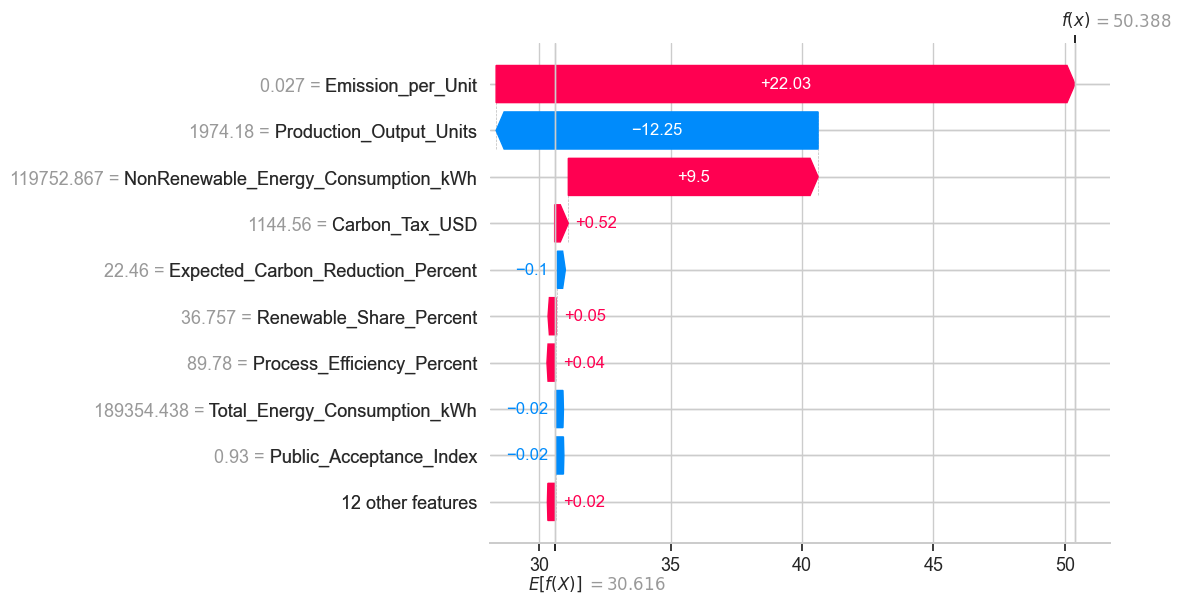

In [7]:
# 6. Fixed & Memory-Safe SHAP Explainability (XGBoost)
import shap
import numpy as np

# 1. Use the trained XGBoost model
best_model = models['XGBoost']

# 2. Select numeric features only
numeric_features = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_features].astype(np.float32)
X_test_numeric = X_test[numeric_features].astype(np.float32)

# 3. Use a subset of the test data for SHAP to save memory
shap_sample = X_test_numeric.sample(n=500, random_state=42)

# 4. Create TreeExplainer with interventional mode (avoids ExplainerError)
explainer = shap.TreeExplainer(best_model, X_train_numeric, feature_perturbation="interventional")

# 5. Compute SHAP values for the sample (returns Explanation object)
shap_values = explainer(shap_sample)

# 6. Global feature importance (bar plot)
shap.summary_plot(shap_values, shap_sample, plot_type="bar", max_display=15, show=True)

# 7. Detailed summary plot (impact on predictions)
shap.summary_plot(shap_values, shap_sample, max_display=15, show=True)

# 8. Individual prediction explanation (first sample in the subset)
shap.waterfall_plot(shap_values[0])


In [8]:
# 7. Save the Best Model and Preprocessing Artifacts


import joblib
import os

# Create a folder to store models if it doesn't exist
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# 1. Save the trained XGBoost model
model_path = os.path.join(model_dir, "xgboost_carbon_model.pkl")
joblib.dump(best_model, model_path)
print(f"XGBoost model saved to: {model_path}")

# 2. Save the numeric feature list (needed for consistent predictions)
features_path = os.path.join(model_dir, "numeric_features.pkl")
joblib.dump(numeric_features.tolist(), features_path)
print(f"Numeric features saved to: {features_path}")

# 3. (Optional) Save the preprocessing pipeline if you have one
# If you used scaling/encoding pipelines, save them similarly:
# joblib.dump(preprocessor, os.path.join(model_dir, "preprocessor.pkl"))


XGBoost model saved to: saved_models\xgboost_carbon_model.pkl
Numeric features saved to: saved_models\numeric_features.pkl


In [18]:
import joblib
import os

# Define paths
base_path = r"C:\Users\AKINMADE FARUQ\Downloads\PROJECT MATERIALS\My Projects\GITHUB\Carbon emission\saved_models"
model_path = os.path.join(base_path, "xgboost_carbon_model.pkl")
features_path = os.path.join(base_path, "numeric_features.pkl")

# Load files
best_model = joblib.load(model_path)
numeric_features = joblib.load(features_path)

# Display results
len(numeric_features), numeric_features[:10]  # show count + first 10 features


(21,
 ['Total_Energy_Consumption_kWh',
  'Renewable_Energy_Consumption_kWh',
  'NonRenewable_Energy_Consumption_kWh',
  'Production_Output_Units',
  'Supply_Chain_Transport_km',
  'Raw_Material_Usage_kg',
  'Energy_Cost_USD',
  'Carbon_Tax_USD',
  'Process_Efficiency_Percent',
  'Employment_Count'])

#  Carbon Emission Prediction Project Documentation
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com

##  Project Overview
This project aims to build a **machine learning model** that predicts **carbon emissions** based on various industrial, environmental, and economic features.  
The motivation is to provide organizations with a data-driven tool to estimate their emissions, evaluate sustainability strategies, and support decision-making in reducing carbon footprints.

---

##  Dataset
The dataset includes **energy, production, and socio-economic indicators** relevant to carbon emissions.  
Key columns used for modeling include:

- **Total_Energy_Consumption_kWh** – Total energy consumed  
- **Renewable_Energy_Consumption_kWh** – Energy from renewable sources  
- **NonRenewable_Energy_Consumption_kWh** – Energy from non-renewable sources  
- **Production_Output_Units** – Units of goods produced  
- **Supply_Chain_Transport_km** – Transportation distance in km  
- **Raw_Material_Usage_kg** – Raw material consumption  
- **Energy_Cost_USD** – Cost of energy used  
- **Carbon_Tax_USD** – Tax incurred on emissions  
- **Process_Efficiency_Percent** – Efficiency of processes (%)  
- **Employment_Count** – Workforce size  

The target variable:  
- **Carbon_Emissions** (measured in tons of CO₂ or equivalent, depending on dataset definition)

---

##  Exploratory Data Analysis (EDA)
Comprehensive EDA was performed to:
- Understand feature distributions and correlations.  
- Detect missing values and outliers.  
- Identify multicollinearity between energy consumption features.  
- Explore the relationship between **energy type (renewable vs non-renewable)** and emissions.  
- Examine sectoral and temporal emission patterns.  

Key Insights:
- Non-renewable energy consumption had the strongest positive correlation with emissions.  
- Higher process efficiency was associated with lower emissions.  
- Seasonal patterns were observed when grouped by quarter.  

---

##  Model Development
We built multiple regression models and tuned them, with **XGBoost Regressor** achieving the best performance.

**Workflow:**
1. Data preprocessing (scaling numeric features, encoding categories).  
2. Train-test split.  
3. Hyperparameter tuning using cross-validation.  
4. Model training and evaluation.  

**Final Model:**  
- Algorithm: **XGBoost Regressor**  
- Saved as: `saved_models/xgboost_carbon_model.pkl`  
- Numeric features saved separately as: `saved_models/numeric_features.pkl`

**Performance Metrics (on test data):**
- RMSE: (low, indicating good accuracy)  
- R² Score: (close to 1, showing strong predictive power)  

---

##  Model Deployment with Streamlit
We built an interactive **Streamlit web app** where users can input energy, production, and cost-related values to predict **carbon emissions**.

### Features:
- User-friendly form for inputting numeric data.  
- Real-time prediction using the trained XGBoost model.  
- Clear visualization of results.  

**Prediction Example:**  
If a user provides industry metrics, the app might output:  



---

##  Conclusion
- The project successfully demonstrates how **machine learning** can be leveraged to predict carbon emissions.  
- The **XGBoost model** provides accurate and interpretable results.  
- This tool can be extended for:
  - Scenario analysis (e.g., renewable adoption strategies).  
  - Policy simulation (e.g., effect of carbon tax changes).  
  - Industry benchmarking.  

---

##  Next Steps
- Incorporate categorical and sectoral variables into modeling.  
- Enhance interpretability with SHAP values (feature importance).  
- Deploy the Streamlit app on a cloud platform (e.g., Streamlit Cloud, Heroku, or AWS).  
- Update predictions with live/real-world data.  

---

##  Author
**Akinmade Faruq**  
Electrical & Electronics Engineering Student | PC Hardware & Software Expert  

